In [47]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle

# Load datasets

In [118]:
def load_dataset(csv_file):
    df = pd.read_csv(csv_file)
    df = df.drop(columns=['user_id'])
    df = df.drop(columns=['Unnamed: 0'])
    df = shuffle(df)
    X = df.loc[:, df.columns != 'is_onsight']
    Y = df['is_onsight']
    return (X.values, Y.values)

X_orig, Y_orig = load_dataset('data/ds_train_orig.csv')
X_bal_orig, Y_bal_orig = load_dataset('data/balanced_orig.csv')
X_imp, Y_imp = load_dataset('data/ds_train_imp.csv')
X_bal_imp, Y_bal_imp = load_dataset('data/balanced_imp.csv')
X_test, Y_test = load_dataset('data/ds_test.csv')

In [119]:
X = {'train_orig': X_orig,
     'bal_orig': X_bal_orig,
     'bal_imp': X_bal_imp,
     'train_imp': X_imp,
     'test': X_test}
Y = {'train_orig': Y_orig,
     'bal_orig': Y_bal_orig,
     'bal_imp': Y_bal_imp,
     'train_imp': Y_imp,
     'test': Y_test}

In [120]:
x_torig = X['train_orig'].shape
x_timp = X['train_imp'].shape
x_borig = X['bal_orig'].shape
x_bimp = X['bal_imp'].shape
x_t = X['test'].shape
print("Training orig set size: {}.".format(x_torig[0]))
print("Training imp size: {}.".format(x_timp[0]))
print("Balanced orig set size: {}.".format(x_borig[0]))
print("Balanced imp size: {}.".format(x_bimp[0]))
print("Test set size: {}.".format(x_t[0]))

Training orig set size: 1758212.
Training imp size: 2171996.
Balanced orig set size: 1126050.
Balanced imp size: 1381634.
Test set size: 432737.


In [121]:
### Standardize data

from sklearn.preprocessing import StandardScaler

train_set_types = ['train_orig', 'bal_orig', 'bal_imp', 'train_imp']

X_std = {}
scaler = StandardScaler()

for set_type in train_set_types:
    scaler.fit(X[set_type])
    X_std[set_type] = scaler.transform(X[set_type])

X_std['test'] = scaler.transform(X['test'])

In [122]:
def print_score(method, model, X, Y, set_type):
    accuracy = model.score(X, Y)
    print("{} method achieves {} {} accuracy.".format(method, accuracy, set_type))

In [123]:
### Metrics/ROC curve/AUC ###

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

def evaluate(model, X_test, Y_test, filename):
    Y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    print('tp, fp, fn, tp =', (tn, fp, fn, tp))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = 2*tp / (2*tp + fp + fn)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("Specificity: ", specificity)
    print("F1: ", f1)
#     Y_pred_proba = model.predict_proba(X_test)[:,1]
#     fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_proba)
#     roc_auc = metrics.auc(fpr, tpr)
#     plt.title('Receiver Operating Characteristic')
#     plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#     plt.legend(loc = 'lower right')
#     plt.plot([0, 1], [0, 1],'r--')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.savefig('output/' + filename)

# Correlation

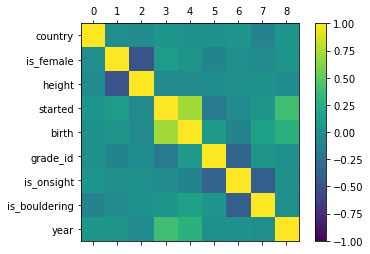

In [171]:
data = pd.read_csv('data/balanced_imp.csv')
data = data.drop(columns=['user_id'])
data = data.drop(columns=['Unnamed: 0'])
names = list(data.columns)
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
# ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.savefig('corr.eps')

In [124]:
X['bal_imp'].shape

(1381634, 8)

# PCA

In [125]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

<Figure size 576x432 with 0 Axes>

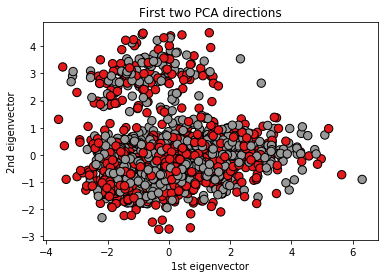

In [169]:
plt.figure(2, figsize=(8, 6))
plt.clf()

X_sub = X_std['bal_imp'][:2000]
Y_sub = Y['bal_imp'][:2000]

# Plot the training points
# plt.scatter(X_sub[:, 0], X_sub[:, 1], c=Y_sub, cmap=plt.cm.Set1,
#             edgecolor='k')
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# x_min, x_max = X_sub[:, 0].min() - .5, X_sub[:, 0].max() + .5
# y_min, y_max = X_sub[:, 1].min() - .5, X_sub[:, 1].max() + .5
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
# fig = plt.figure(1, figsize=(8, 6))
# ax = Axes3D(fig, elev=-150, azim=110)
# X_reduced = PCA(n_components=3).fit_transform(X_sub)
# ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y_sub,
#            cmap=plt.cm.Set1, edgecolor='k', s=40)
# ax.set_title("First three PCA directions")
# ax.set_xlabel("1st eigenvector")
# ax.w_xaxis.set_ticklabels([])
# ax.set_ylabel("2nd eigenvector")
# ax.w_yaxis.set_ticklabels([])
# ax.set_zlabel("3rd eigenvector")
# ax.w_zaxis.set_ticklabels([])


plt.figure()
X_reduced = PCA(n_components=3).fit_transform(X_sub)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y_sub,
           cmap=plt.cm.Set1, edgecolor='k', s=70)
plt.title("First two PCA directions")
plt.xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
plt.ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.savefig('pca2.eps')

In [130]:
Y_sub.shape

(2500,)

In [59]:
lr = LogisticRegression(solver='liblinear', verbose=1, max_iter=100).fit(X_reduced, Y_sub)

[LibLinear]

pca method achieves 0.68329 training accuracy.
tp, fp, fn, tp = (170223, 132096, 58835, 71583)
Precision:  0.35145007585465365
Recall:  0.5488736217393304
Specificity:  0.563057565022377
F1:  0.4285162692272005


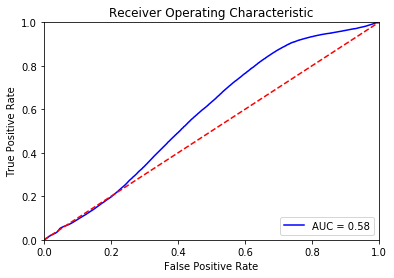

In [60]:
print_score('pca', lr, X_reduced, Y_sub, 'training')
X_test_reduced = PCA(n_components=3).fit_transform(X_std['test'])

evaluate(lr, X_test_reduced, Y['test'], filename='lr_pca_1000')

# Logistic regression

In [156]:
logreg = defaultdict(lambda: defaultdict(int))

set_types = ['train_orig']#, 'bal_orig']
# set_types = ['bal_imp']
# set_types = ['bal_orig']

for set_type in set_types:
    print("Set: ", set_type)
    logreg['vanilla'][set_type] = LogisticRegression(solver='liblinear', verbose=1, max_iter=100).fit(X[set_type], Y[set_type])
#     logreg['l1'][set_type] = LogisticRegression(penalty='l1', solver='liblinear', verbose=1, max_iter=100).fit(X[set_type], Y[set_type])

    print_score('vanilla', logreg['vanilla'][set_type], X_std[set_type], Y[set_type], 'training')
    print_score('vanilla', logreg['vanilla'][set_type], X_std['test'], Y['test'], 'test')
#     print_score('l1', logreg['l1'][set_type], X[set_type], Y[set_type], 'training')
#     print_score('l1', logreg['l1'][set_type], X['test'], Y['test'], 'test')
#     logreg['l1'] = LogisticRegression(max_iter=10, penalty='l1', solver='liblinear', verbose=10).fit(X, Y)
# logreg_elastic = LogisticRegression(penalty='elasticnet', solver='liblinear', verbose=1).fit(X, Y)

Set:  train_orig
[LibLinear]vanilla method achieves 0.5807979925060232 training accuracy.
vanilla method achieves 0.5616991382756732 test accuracy.


In [157]:
# evaluate(logreg['vanilla']['bal_orig'], X_std['bal_orig'], Y['bal_orig'], filename='lr_l1_bal_orig_100')
# evaluate(logreg['vanilla']['bal_orig'], X_std['test'], Y['test'], filename='lr_l2_bal_orig_100')
evaluate(logreg['vanilla']['train_orig'], X_std['test'], Y['test'], filename='lr_l2_bal_orig_100')
# evaluate(logreg['vanilla']['bal_imp'], X_std['bal_imp'], Y['bal_imp'], filename='lr_l2_bal_orig_std_100_MALE')
# evaluate(logreg['vanilla']['bal_imp'], X_std['test'], Y['test'], filename='lr_l2_bal_orig_std_100_MALE')
# evaluate(logreg['l1']['bal_m'], X['test'], Y['test'], filename='lr_l1_bal_imp_100')

tp, fp, fn, tp = (123064, 179255, 10414, 120004)
Precision:  0.40100381275082786
Recall:  0.9201490591789477
Specificity:  0.4070667076829442
F1:  0.5585777223356149


Observations: bal_orig better than bal_imp for l1, same for l2
-> keep bal_orig from now on since bal_imp doesn't seem to add anything of consequence

### Kernelized Logistic Regression

In [7]:
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import check_pairwise_arrays

In [9]:
def anova_kernel(X, Y=None, gamma=None, p=1):
    X, Y = check_pairwise_arrays(X, Y)
#     print("X = ", X)
#     print("Y = ", Y)
    if gamma is None:
        gamma = 1. / X.shape[1]

    diff = X[:, None, :] - Y[None, :, :]
    diff **= 2
    diff *= -gamma
    np.exp(diff, out=diff)
    K = diff.sum(axis=2)
    K **= p
    return K

In [14]:
K_train = anova_kernel(X_std['bal_orig'][:1000])
clf = Pipeline([('nys', Nystroem(n_components=100)),
                ('lr', LogisticRegression())])
clf.fit(K_train, Y['bal_orig'][:1000])

K_test = anova_kernel(X_std['test'][:1000], X_std['bal_orig'][:1000])
# preds = clf.predict(K_test)
print_score('KLR_anova', clf, K_test, Y['test'][:1000], 'bal_orig')

/home/zhangvwk/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KLR_anova method achieves 0.692 bal_orig accuracy.


tp, fp, fn, tp = (466, 246, 62, 226)
Precision:  0.4788135593220339
Recall:  0.7847222222222222
Specificity:  0.6544943820224719
F1:  0.5947368421052631


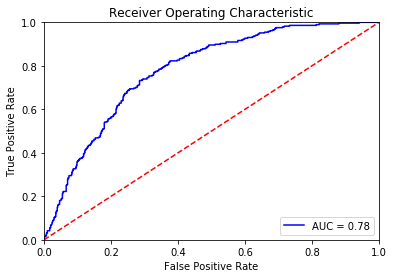

In [15]:
evaluate(clf, K_test, Y['test'][:1000], filename='klr_anova_1000')

# SVM

### train_orig

In [ ]:
x_train_orig_sub = X['train_orig']
y_train_orig_sub = Y['train_orig']

# for set_type in set_types:
#     print("Set: ", set_type)
svm_rbf = SVC(gamma='auto', verbose=1).fit(x_train_orig_sub, y_train_orig_sub)
    # svm_rbf = SVC(gamma='auto').fit(X, Y)

svm_rbf.score(x_train_orig_sub, y_train_orig_sub)

[LibSVM]

In [ ]:
print_score('svm_rbf', svm_rbf, X['test'], Y['test'], 'test')
evaluate(svm_rbf, X['test'], Y['test'])

Observations: no convergence on the train_orig training set after multiple hours of training, too many samples.

### bal_orig

In [134]:
x_train_orig_sub = X_std['bal_imp'][:10000]
y_train_orig_sub = Y['bal_imp'][:10000]

svm_rbf = SVC(kernel='linear', gamma='auto', verbose=1).fit(x_train_orig_sub, y_train_orig_sub)
svm_rbf.score(x_train_orig_sub, y_train_orig_sub)

[LibSVM]

0.7329

In [135]:
print_score('svm_rbf', svm_rbf, x_train_orig_sub, y_train_orig_sub, 'bal_imp')
print_score('svm_rbf', svm_rbf, X_std['test'], Y['test'], 'test')

evaluate(svm_rbf, X_std['bal_imp'], Y['bal_imp'], filename='svm_sig_1000_std_bal_orig')
evaluate(svm_rbf, X_std['test'], Y['test'], filename='svm_sig_1000_std_bal_orig')

svm_rbf method achieves 0.7329 bal_imp accuracy.
svm_rbf method achieves 0.6911773201736852 test accuracy.
tp, fp, fn, tp = (470090, 220727, 142216, 548601)
Precision:  0.713091165276709
Recall:  0.794133612809181
Specificity:  0.6804841224231598
F1:  0.7514335904995737
tp, fp, fn, tp = (187812, 114507, 19132, 111286)
Precision:  0.4928673608127798
Recall:  0.8533024582496281
Specificity:  0.6212378315620255
F1:  0.6248319114232856


# Random forest

### train_orig

In [ ]:
# RANDOM FOREST ###
from sklearn.ensemble import RandomForestClassifier
n_est = 10
rfc = RandomForestClassifier(n_estimators=n_est, max_depth=2, random_state=0)
rfc.fit(X['train_orig'], Y['train_orig'])

In [14]:
rfc.score(X['train_orig'], Y['train_orig'])
print_score('rfc_{}'.format(n_est), rfc, X['test'], Y['test'], 'test')

rfc_10 method achieves 0.6986206402503137 test accuracy.


In [15]:
evaluate(rfc, X['test'][:100,], Y['test'][:100,])

tp, fp, fn, tp = (41, 0, 59, 0)
Precision:  nan
Recall:  0.0
Specificity:  1.0
F1:  0.0


/home/zhangvwk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


Observations: worst results possible. Misclassifies the minority class entirely.

### bal_orig

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
n_est = 100
rfc = RandomForestClassifier(n_estimators=n_est, max_depth=2, random_state=0, class_weight='balanced_subsample')
rfc.fit(X_std['bal_imp'], Y['bal_imp'])

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [138]:
print_score('rfc_{}'.format(n_est), rfc, X_std['bal_imp'], Y['bal_imp'], 'bal_imp')
print_score('rfc_{}'.format(n_est), rfc, X_std['test'], Y['test'], 'test')

rfc_100 method achieves 0.7140024058469898 bal_imp accuracy.
rfc_100 method achieves 0.6542796201850084 test accuracy.


In [139]:
evaluate(rfc, X_std['bal_imp'], Y['bal_imp'], filename='rfc_100_bal_orig')
evaluate(rfc, X_std['test'], Y['test'], filename='rfc_100_bal_orig')

tp, fp, fn, tp = (413313, 277504, 117640, 573177)
Precision:  0.673786060814806
Recall:  0.829708880933735
Specificity:  0.5982959307602448
F1:  0.7436623336520709
tp, fp, fn, tp = (173477, 128842, 20764, 109654)
Precision:  0.4597729102374883
Recall:  0.8407888481651306
Specificity:  0.573821030103963
F1:  0.5944691716768677


# AdaBoost

In [152]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [158]:
n_est = 100
adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=n_est, random_state=0)
# adab = AdaBoostClassifier(base_estimator=LogisticRegression(solver='liblinear'), n_estimators=n_est, random_state=0)
# adab.fit(X_std['bal_imp'], Y['bal_imp'])  
adab.fit(X['train_orig'], Y['train_orig'])

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [161]:
print_score('adab_{}'.format(n_est), adab, X['train_orig'], Y['train_orig'], 'bal_orig')
# print_score('adab_{}'.format(n_est), adab, X_std['bal_imp'], Y['bal_imp'], 'train_imp')
print_score('adab_{}'.format(n_est), adab, X_std['test'], Y['test'], 'test')

adab_100 method achieves 0.7502269350908765 bal_orig accuracy.
adab_100 method achieves 0.5616945165308259 test accuracy.


In [162]:
# evaluate(adab, X_std['bal_imp'], Y['bal_imp'], filename='adab_lrl2100_bal_orig_100')
evaluate(adab, X_std['train_orig'], Y['train_orig'], filename='adab_lrl2100_bal_orig_100')
evaluate(adab, X_std['test'], Y['test'], filename='adab_lrl2100_bal_orig_100')

tp, fp, fn, tp = (479192, 715995, 37888, 525137)
Precision:  0.4231113209553859
Recall:  0.9327063629501354
Specificity:  0.4009347491229406
F1:  0.5821411329501812
tp, fp, fn, tp = (123062, 179257, 10414, 120004)
Precision:  0.4010011327904405
Recall:  0.9201490591789477
Specificity:  0.4070600921543138
F1:  0.5585751223587841


# MLP

In [144]:
from sklearn.neural_network import MLPClassifier

In [145]:
layers = (5,5,5,5)

In [146]:
### L2 regularization ###
mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter=200,
                    solver='adam', verbose=10)

In [147]:
mlp.fit(X_std['bal_imp'], Y['bal_imp'])

Iteration 1, loss = 0.52930621
Iteration 2, loss = 0.51932865
Iteration 3, loss = 0.51824316
Iteration 4, loss = 0.51790070
Iteration 5, loss = 0.51776294
Iteration 6, loss = 0.51753254
Iteration 7, loss = 0.51741712
Iteration 8, loss = 0.51729926
Iteration 9, loss = 0.51720142
Iteration 10, loss = 0.51714240
Iteration 11, loss = 0.51710636
Iteration 12, loss = 0.51701980
Iteration 13, loss = 0.51692465
Iteration 14, loss = 0.51690271
Iteration 15, loss = 0.51689876
Iteration 16, loss = 0.51680493
Iteration 17, loss = 0.51682682
Iteration 18, loss = 0.51679778
Iteration 19, loss = 0.51676732
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5, 5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

In [148]:
print_score('mlp_{}'.format(str(layers)), mlp, X_std['bal_imp'], Y['bal_imp'], 'bal_imp')
print_score('mlp_{}'.format(str(layers)), mlp, X_std['test'], Y['test'], 'test')

mlp_(5, 5, 5, 5) method achieves 0.7429022447334098 bal_imp accuracy.
mlp_(5, 5, 5, 5) method achieves 0.6909970721246392 test accuracy.


In [149]:
evaluate(mlp, X_std['test'], Y['test'], filename='mlp_101010_bal_orig_200')
evaluate(mlp, X_std['bal_imp'], Y['bal_imp'], filename='mlp_101010_bal_orig_200')

tp, fp, fn, tp = (186685, 115634, 18083, 112335)
Precision:  0.4927643670849984
Recall:  0.8613458264963425
Specificity:  0.617509981178821
F1:  0.6268921584767304
tp, fp, fn, tp = (464227, 226590, 128625, 562192)
Precision:  0.7127343169595655
Recall:  0.813807419331024
Specificity:  0.6719970701357957
F1:  0.7599248174674355


In [150]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

Normalized confusion matrix
[[0.62 0.38]
 [0.14 0.86]]


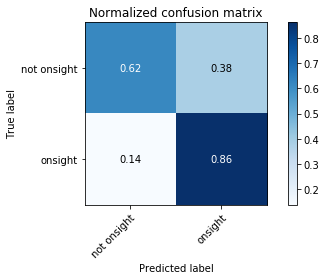

In [151]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

y_pred = mlp.predict(X_std['test'])
y_test = Y['test']
class_names = np.array(['not onsight','onsight'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names,
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()
plt.savefig('confusion.eps')

In [88]:
### Early stopping ###
mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter=200, early_stopping=True,
                    solver='adam', verbose=10)

In [89]:
mlp.fit(X_std['bal_imp'], Y['bal_imp'])

Iteration 1, loss = 0.51327961
Validation score: 0.750394
Iteration 2, loss = 0.50694317
Validation score: 0.751887
Iteration 3, loss = 0.50562299
Validation score: 0.751807
Iteration 4, loss = 0.50490985
Validation score: 0.752122
Iteration 5, loss = 0.50453388
Validation score: 0.752881
Iteration 6, loss = 0.50425773
Validation score: 0.753196
Iteration 7, loss = 0.50399632
Validation score: 0.753325
Iteration 8, loss = 0.50381714
Validation score: 0.753292
Iteration 9, loss = 0.50366442
Validation score: 0.753365
Iteration 10, loss = 0.50343643
Validation score: 0.753454
Iteration 11, loss = 0.50329028
Validation score: 0.753963
Iteration 12, loss = 0.50318851
Validation score: 0.754019
Iteration 13, loss = 0.50305421
Validation score: 0.753551
Iteration 14, loss = 0.50298360
Validation score: 0.754245
Iteration 15, loss = 0.50291286
Validation score: 0.752122
Iteration 16, loss = 0.50278485
Validation score: 0.752760
Iteration 17, loss = 0.50274225
Validation score: 0.753406
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

In [90]:
print_score('mlp_{}'.format(str(layers)), mlp, X_std['bal_imp'], Y['bal_imp'], 'bal_imp')
print_score('mlp_{}'.format(str(layers)), mlp, X_std['test'], Y['test'], 'test')

mlp_(10, 10, 10) method achieves 0.7547409160535876 bal_imp accuracy.
mlp_(10, 10, 10) method achieves 0.6929721681131633 test accuracy.


In [91]:
evaluate(mlp, X_std['test'], Y['test'], filename='mlp_101010_bal_orig_200_ES')

tp, fp, fn, tp = (168722, 105300, 15120, 103070)
Precision:  0.49464894178624563
Recall:  0.8720703951264912
Specificity:  0.6157242849114305
F1:  0.6312469377756001


Observations: layers (50, ) outperforms (50,50) in test accuracy (probably overfits) and other relevant metrics.